In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/# DS Capstone/2 Multi-linear

/content/drive/MyDrive/# DS Capstone/2 Multi-linear


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Load file
file_path = './data_20y.xlsx'
df = pd.read_excel(file_path)

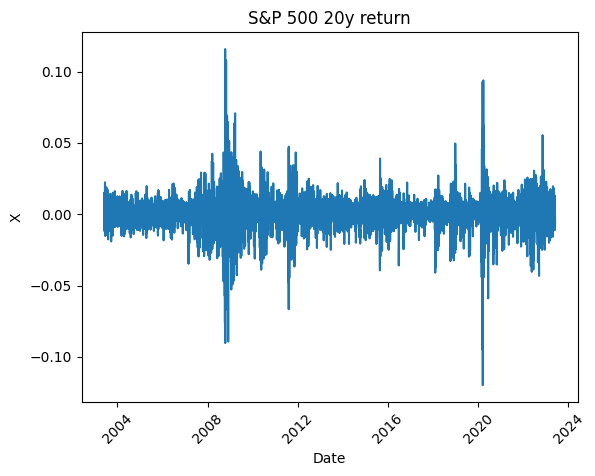

In [ ]:
# Plot the data
plt.plot(df['date'], df['sp_20y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('S&P 500 20y return')
plt.xticks(rotation=45)
plt.show()

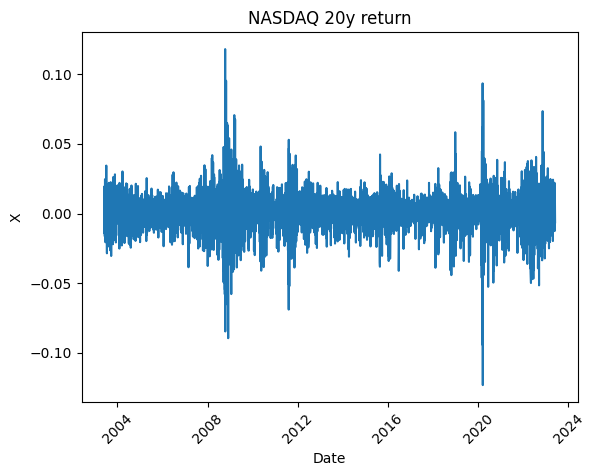

In [ ]:
# Plot the data
plt.plot(df['date'], df['nas_20y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('NASDAQ 20y return')
plt.xticks(rotation=45)
plt.show()

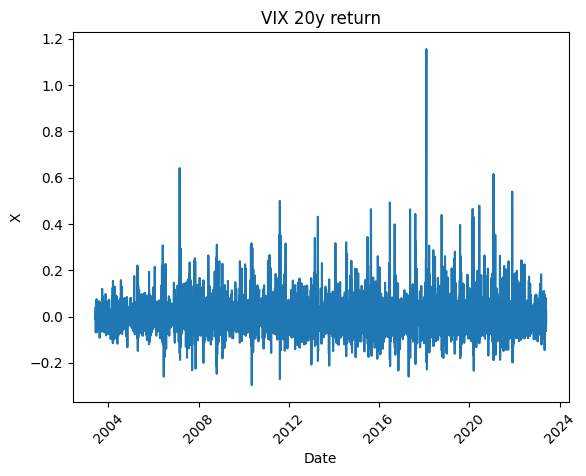

In [ ]:
# Plot the data
plt.plot(df['date'], df['vix_20y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('VIX 20y return')
plt.xticks(rotation=45)
plt.show()

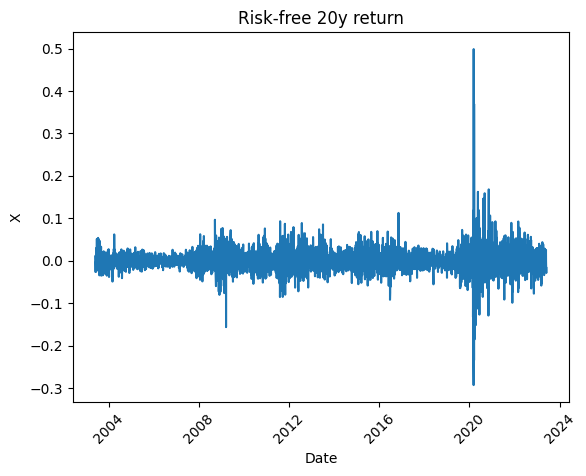

In [ ]:
# Plot the data
plt.plot(df['date'], df['rf_20y'])
plt.xlabel('Date')
plt.ylabel('X')
plt.title('Risk-free 20y return')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Compute correlation
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-9-c110f74110fd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,shci_20y,sp_20y,nas_20y,vix_20y,rf_20y,forward_shci_20y
shci_20y,1.000000,0.094651,0.098937,-0.082881,0.058034,0.008129
sp_20y,0.094651,1.000000,0.947144,-0.719140,0.315668,0.152886
nas_20y,0.098937,0.947144,1.000000,-0.704387,0.268724,0.158403
vix_20y,-0.082881,-0.719140,-0.704387,1.000000,-0.246429,-0.143972
rf_20y,0.058034,0.315668,0.268724,-0.246429,1.000000,0.027967
forward_shci_20y,0.008129,0.152886,0.158403,-0.143972,0.027967,1.000000


In [ ]:
df.drop(df.tail(1).index,inplace=True)
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
import statsmodels.api as sm

X = df[['shci_20y', 'sp_20y', 'nas_20y', 'vix_20y', 'rf_20y']]
y = df['forward_shci_20y']

X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       forward_shci_20y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     26.62
Date:                Tue, 31 Oct 2023   Prob (F-statistic):           1.27e-26
Time:                        11:29:13   Log-Likelihood:                 13115.
No. Observations:                4695   AIC:                        -2.622e+04
Df Residuals:                    4689   BIC:                        -2.618e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.943      0.3

In [13]:
from sklearn.metrics import mean_squared_error

predictions = results.predict(X)

rmse = np.sqrt(mean_squared_error(y, predictions))

print('Root Mean Squared Error (RMSE):', rmse)

Root Mean Squared Error (RMSE): 0.014812677788860619
